# Market Segmentation Analysis on McDonald data

## About:

McDonald's is a global giant in the fast-food industry, renowned for its iconic golden arches, signature burgers, and french fries.
The case study aims to leverage market segmentation analysis to identify the distinct customer segments and their brand image of McDonald's. 
This information can then be used for taking marketing decisions and potentially improve brand perception across different customer groups.

## Problem Statement:

    Does McDonald's have distinct customer segments with significantly different brand perceptions?

### DatasetLink:

https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

# for k-means analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# for supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


### STEP-1: Deciding (not) to Segment
    
Despite wide reach of McDonald's, there might be value in understanding:

Systematic Heterogeneity: 
Do different customer groups have different needs, preferences, and perceptions of McDonald's?

Differentiated Marketing Strategy: 
Can McDonald's tailor its marketing mix (product, price, place, promotion) to resonate better with specific segments?

### Step 2: Specifying the Ideal Target Segment

Here are the key takeaways on market segment attractiveness for McDonald's in this case study:

#### Knock-Out Criteria (Essential Qualities):

    Homogeneity: Segment members should be similar in key characteristics (e.g., liking similar menu items).
    
    Distinctness: Segments should differ substantially from each other (e.g., one segment prefers value meals, another prefers healthier options).
    
    Size: The segment should be large enough to justify the effort of creating a customized marketing mix.
    
    Match with McDonald's Strengths: The segment should be receptive to fast food and open to McDonald's offerings.
    
    Identifiable: There should be a way to distinguish segment members from other consumers (e.g., demographics, behavior).
    
    Reachable: Channels exist to communicate and distribute products to the target segment effectively.



#### Segment Attractiveness Criteria (Ideal Qualities - May Vary):

    Positive Perception of McDonald's: Existing brand loyalty and positive image are desirable.
    
    Frequent Eating Out & Liking Fast Food: Aligns well with McDonald's core business.

### Step 3: Collecting Data

This step highlights the data available for McDonald's market segmentation:

    Data Points: Perceptions of McDonald's on specific attributes:
    YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, DISGUSTING
    Demographics: Age and Gender

### Step 4: Exploring Data

In [4]:
#columns in the data
print(list(data.columns))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [5]:
#shape of data
print(data.shape)

(1453, 15)


Insight: There are 15 columns and 1453 datapoints(rows) in the data set.

In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [8]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Insight: No null values found

### Uni-variate Analysis

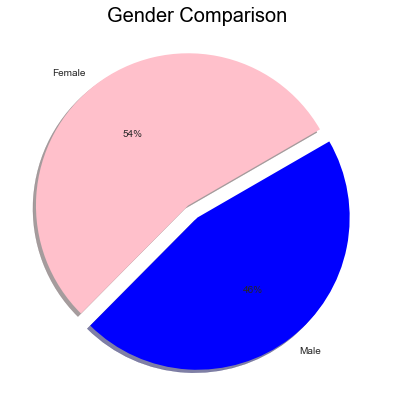

In [9]:
plt.figure(figsize=(12,7))
plt.pie(data['Gender'].value_counts(), labels= data.Gender.unique(), 
        colors=['pink','blue'], autopct='%.0f%%', explode = [0.1, 0], shadow = True, startangle=30)
plt.title('Gender Comparison',fontsize=20, color = 'Black')
plt.show()

Insight: Our data ha 54% female and 46% male customers.

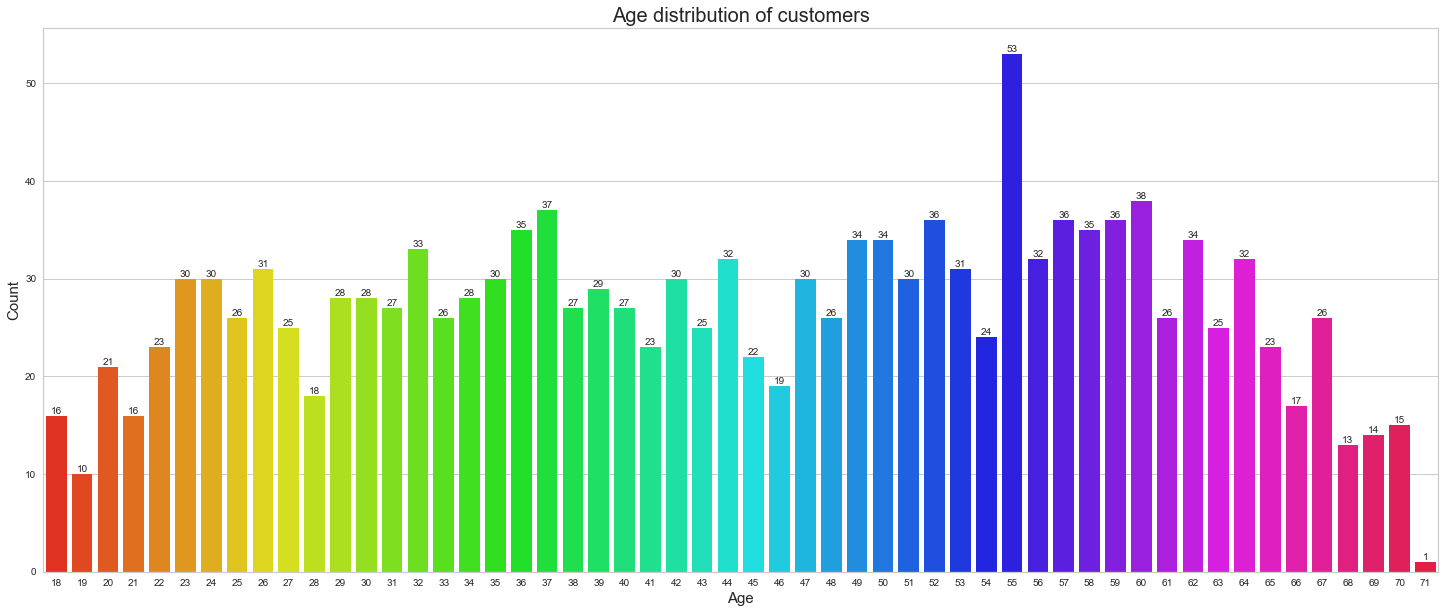

In [10]:
plt.figure(figsize=(25,10))
f = sns.countplot(x=data['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.xlabel('Age',fontsize='15')
plt.ylabel('Count',fontsize='15')
plt.title('Age distribution of customers', fontsize='20')
plt.show()

Insights: According to the data there are customers with age 55

### Bi-Variate Analysis

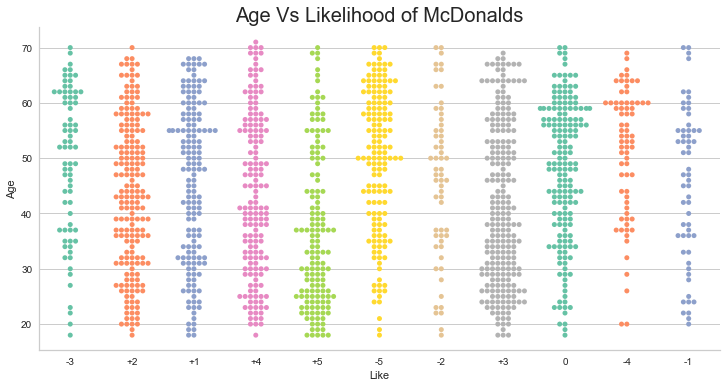

In [11]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=data, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Age Vs Likelihood of McDonalds', fontsize=20)
plt.show()

Insights: 
    
    From the plot it is known that +3, +2,+5 are the most frequent ratings and is distributed among customers of all ages.
    -1 and -2 are least rated ratings which tells us most of the customers likes McDonalds.

In [12]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [13]:
# colums on which PCA wll be conducted
binary_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
               'tasty', 'expensive', 'healthy', 'disgusting']

In [14]:
encoded_data = data[binary_cols]
for col in binary_cols:
  encoded_data[col] = encoded_data[col].replace({'Yes': 1, 'No': 0})

In [15]:
#Contains only data required for Principal component analysis
encoded_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


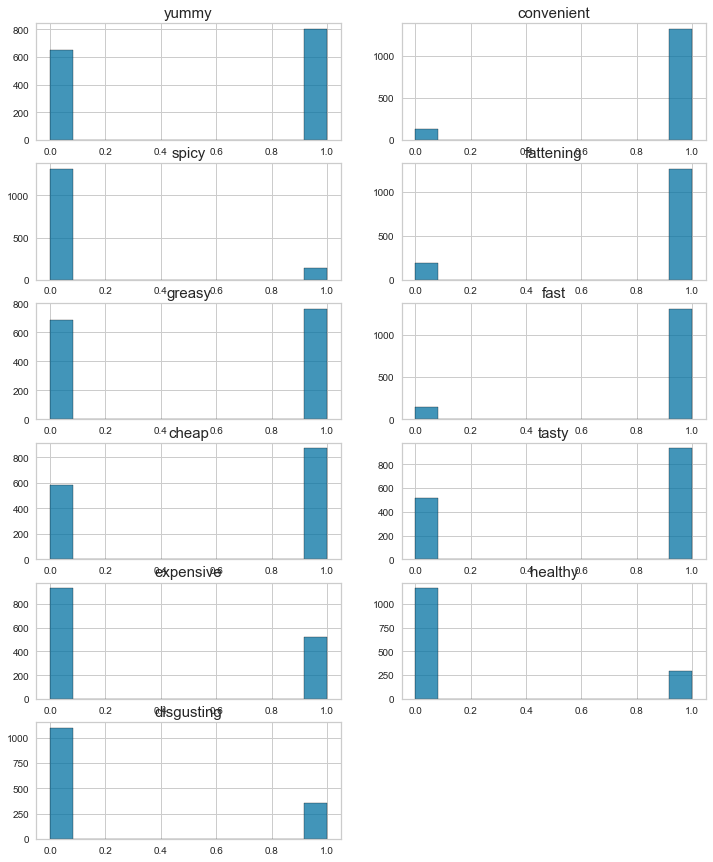

In [16]:
#Histogram of the each attributes
plt.figure(figsize=(12,15))
for i,col in enumerate(binary_cols):
    plt.subplot(int(len(binary_cols)/2)+1, 2, i+1)
    sns.histplot(data=encoded_data, x=col)
    plt.title(col, fontsize='15')
    plt.xlabel("")
    plt.ylabel("")
plt.show()

Insights: More Customers say McDonalds is tasty,cheap,fast,fattening,yummy,convinent.

In [17]:
encoded_data.describe().round(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.00,1453.00,1453.00,1453.00,1453.00,1453.0,1453.00,1453.00,1453.00,1453.0,1453.00
mean,0.55,0.91,0.09,0.87,0.53,0.9,0.60,0.64,0.36,0.2,0.24
std,0.50,0.29,0.29,0.34,0.50,0.3,0.49,0.48,0.48,0.4,0.43
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
25%,0.00,1.00,0.00,1.00,0.00,1.0,0.00,0.00,0.00,0.0,0.00
50%,1.00,1.00,0.00,1.00,1.00,1.0,1.00,1.00,0.00,0.0,0.00
75%,1.00,1.00,0.00,1.00,1.00,1.0,1.00,1.00,1.00,0.0,0.00
max,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00


Insight: 
    
    91% customers says McD is convenient, 55% says it is yummy, 60% says it is cheap and 87% says its fattening.

#### Principal Component analysis

In [18]:

# Creating a PCA object
pca = PCA()

# Fitting the PCA model to the McD's perception data
pca.fit(encoded_data)

# Transforming the data to the principal component space 
encoded_data_pca = pca.transform(encoded_data)


In [19]:
pf = pd.DataFrame(data = encoded_data_pca, columns = [f"PC{i+1}" for i in range(encoded_data.shape[1])])

In [20]:
# DataFrame with principal component data
pf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [21]:
# DataFrame with principal components and the features / Loadings
# In Principal Component Analysis (PCA), loadings represent the weights or coefficients associated with 
# each original feature in a particular principal component (PC). 
# They essentially tell how much each original feature contributes to the formation of that specific PC.

pc = pd.DataFrame(pca.components_.round(2),index = [f"PC{i+1}" for i in range(encoded_data.shape[1])],columns=binary_cols)
pc

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
PC1,-0.48,-0.16,-0.01,0.12,0.30,-0.11,-0.34,-0.47,0.33,-0.21,0.37
PC2,0.36,0.02,0.02,-0.03,-0.06,-0.09,-0.61,0.31,0.60,0.08,-0.14
PC3,-0.30,-0.06,-0.04,-0.32,-0.80,-0.06,-0.15,-0.29,0.02,0.19,-0.09
PC4,0.06,-0.14,0.20,-0.35,0.25,-0.10,0.12,-0.00,0.07,0.76,0.37
PC5,-0.31,0.28,0.07,-0.07,0.36,0.11,-0.13,-0.21,-0.00,0.29,-0.73
PC6,0.17,-0.35,-0.36,-0.41,0.21,-0.59,-0.10,-0.08,-0.26,-0.18,-0.21
PC7,-0.28,-0.06,0.71,-0.39,0.04,-0.09,-0.04,0.36,-0.07,-0.35,-0.03
PC8,0.01,-0.11,0.38,0.59,-0.14,-0.63,0.14,-0.07,0.03,0.18,-0.17
PC9,0.57,-0.02,0.40,-0.16,-0.00,0.17,0.08,-0.64,0.07,-0.19,-0.07
PC10,-0.11,-0.67,-0.08,-0.01,0.01,0.24,0.43,0.08,0.45,-0.04,-0.29


In [22]:
print("Principal Component Summary:\n")
print(pd.DataFrame({
    "Standard deviation": pca.explained_variance_.round(2),
    "Proportion of Variance": pca.explained_variance_ratio_.round(2),
    "Cumulative variance Ratio": pca.explained_variance_ratio_.cumsum().round(2)
}, index=[f"PC{i+1}" for i in range(encoded_data.shape[1])]))

Principal Component Summary:

      Standard deviation  Proportion of Variance  Cumulative variance Ratio
PC1                 0.57                    0.30                       0.30
PC2                 0.37                    0.19                       0.49
PC3                 0.25                    0.13                       0.63
PC4                 0.16                    0.08                       0.71
PC5                 0.11                    0.06                       0.77
PC6                 0.10                    0.05                       0.82
PC7                 0.08                    0.04                       0.86
PC8                 0.08                    0.04                       0.90
PC9                 0.07                    0.04                       0.94
PC10                0.06                    0.03                       0.97
PC11                0.06                    0.03                       1.00


Insights:
    
    - From the above data it is observerd that, the cumulative variance for the PC3 is 0.63 says that the first three principal components (PC1, PC2, PC3) capture a significant portion of the variance (63%) in the data. The remaining principal components contribute progressively less variance.
    - The first three principal components (PC1, PC2, PC3) are likely the most important for capturing the essential structure of the data.
    - By keeping only the first few principal components, you can achieve a lower-dimensional representation of the data while preserving most of the important information. This can be useful for visualization, data analysis tasks like clustering, or reducing computational costs in machine learning models.

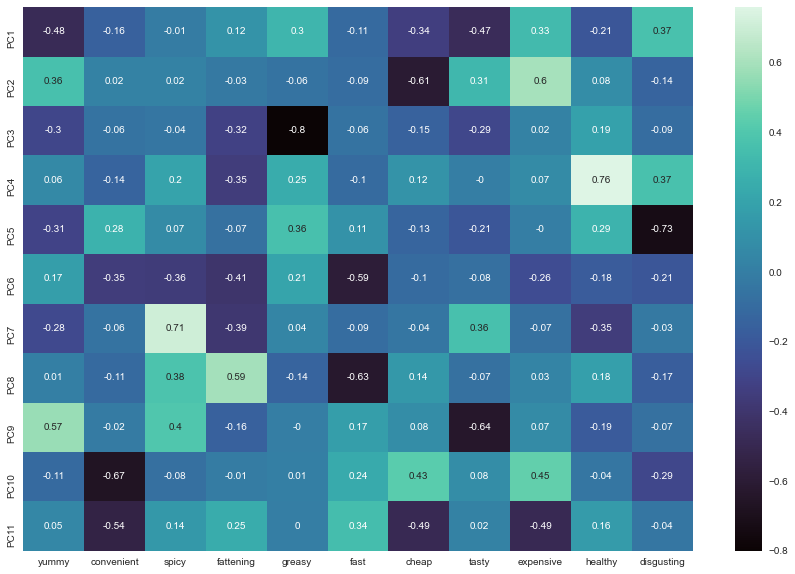

In [23]:
#Correlation matrix plot for loadings 

plt.figure(figsize=(15,10))
ax = sns.heatmap(pc, annot=True, cmap='mako')
plt.show()

Insights:
    
    (Yummy,tasty) and (cheap,expensive) are the features with heighest weights in PC1, PC2 respectively.

In [24]:
# color palette
color = ['#66e4c0', '#8389ce', '#b89c5b', '#f051a0', '#714e08', '#2f1f4b', '#a631bf', '#62f7e5', '#f634fa', '#eaca02', '#c80ca8']

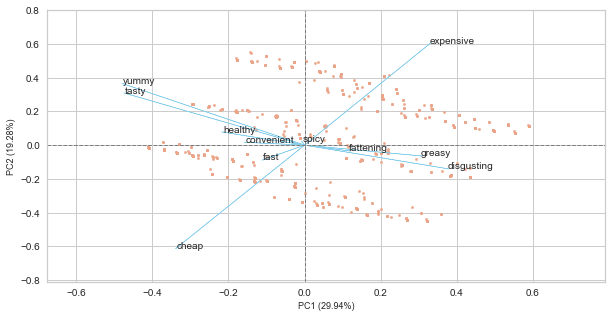

In [25]:
# 2D biplot for 

cluster.biplot(cscore= encoded_data_pca, loadings= pca.components_, labels=encoded_data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

Insights:
    
    -Generally, healthy items tend to be rated lower on tastiness. 
    There's a negative correlation between the two variables, 
    visible in the downward trend of data points from left to right.
    
    -There seems to be more spread in tastiness ratings for unhealthy items compared to healthy ones. 
    The data points for unhealthy items (on the right side) appear more scattered across the y-axis, 
    suggesting a wider range of perceived tastiness for unhealthy options.
    
    -The text labels for expensive and cheap are not positioned near any specific areas of the data cloud, 
    indicating a mixed distribution of tastiness and health ratings across both cost categories.

### Step 5: Extracting Segments

    - The goal is to segment data points into distinct groups (segments) based on their characteristics.
    
    - This helps identify patterns and understand how different data subsets behave.

Following are the extraction techniques:

    K-means clustering: A popular clustering algorithm that partitions data points into a predefined number of clusters (k). It identifies groups based on their distance in the feature space.The distortion score represents the sum of squared distances between data points and their assigned cluster centers. Lower distortion scores generally indicate better clustering.
    
    Finite mixtures of binary distributions: This method assumes the data can be modeled by a combination of probability distributions with binary outcomes (e.g., 0 or 1). It helps identify groups with distinct binary characteristics.
    
    Finite mixtures of regressions: Similar to the previous technique, this uses a combination of probability distributions, but instead of binary outcomes, it utilizes regression models to model continuous relationships within each segment.

#### Using k-Means

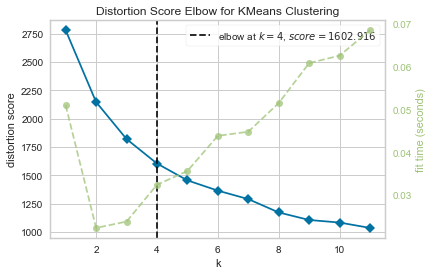

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
#Using k-means clustering analysis
#Extracting segments: Using Elbow Method for Determining the Optimal Number of Clusters
#Distortion plot shows the distortion score (y-axis) for different values of k (number of clusters) on the x-axis

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(encoded_data_pca)
visualizer.show()

Insights: 
    
    -The distortion score initially decreases rapidly as the number of clusters (k) increases. This is because with more clusters, data points are likely assigned to closer cluster centers, reducing the overall distance.
    As k continues to increase, the rate of decrease in distortion score slows down or plateaus. This indicates that adding more clusters might not provide a significant improvement in clustering quality.

    -The elbow point is the value of k where the distortion score starts to plateau or decrease slowly. In this plot, elbow point is at k=4.

In [27]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(encoded_data_pca)
encoded_data['cluster_num'] = kmeans.labels_ #adding to df
data['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 1 1 ... 1 3 0]
1603.0502444719928
4
[[ 1.20419656e+00  2.06319679e-01  2.23787949e-01  8.97327150e-02
  -5.77926012e-02 -5.68880213e-04 -3.54436370e-02 -5.14152205e-03
   7.47296772e-03  1.21211988e-02  6.86635662e-03]
 [ 3.32107036e-02  8.62297487e-01 -1.62035269e-01 -3.52631956e-02
   4.16966478e-02 -4.51989789e-02  1.18909428e-02  3.38329448e-03
   1.57241315e-02  2.25565665e-02 -3.50141689e-02]
 [ 2.79526626e-01 -7.13920162e-01  1.06229565e-01 -8.72314040e-02
   1.25759534e-01 -4.24149016e-02  5.52047088e-02 -5.65458695e-03
  -7.35764680e-02 -4.95311452e-05 -4.63932542e-03]
 [-7.63972296e-01 -9.91358058e-02 -8.02633923e-02  4.26388474e-02
  -8.83991133e-02  5.74780627e-02 -3.04181297e-02  4.33801880e-03
   3.96867527e-02 -1.89145114e-02  2.11026677e-02]]


In [28]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({2: 375, 1: 314, 3: 526, 0: 238})

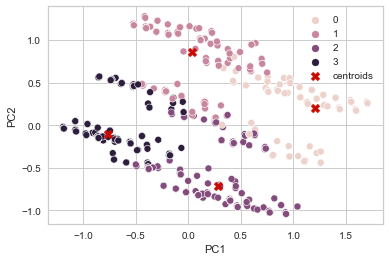

In [29]:
#Visulazing clusters using encoded- pca fitted data and kmeans labels
sns.scatterplot(data=pf, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

Insights:
    
    The above plot represents the four clusters of data with their centers.

### Step 6: Profiling Segments

In [30]:
print("Cluster\tPercentage")
print((encoded_data.cluster_num.value_counts()/len(encoded_data)).round(2)*100,'%')

Cluster	Percentage
3    36.0
2    26.0
1    22.0
0    16.0
Name: cluster_num, dtype: float64 %


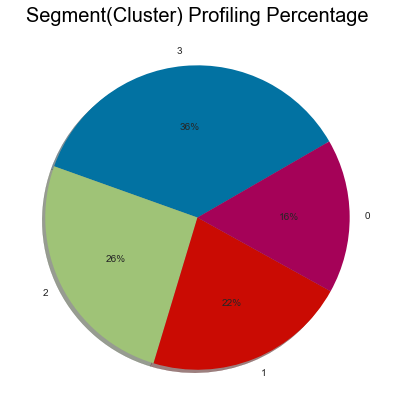

In [31]:
plt.figure(figsize=(12,7))
plt.pie(encoded_data['cluster_num'].value_counts(), labels= encoded_data['cluster_num'].value_counts().index, 
         autopct='%.0f%%',  shadow = True, startangle=30)
plt.title('Segment(Cluster) Profiling Percentage',fontsize=20, color = 'Black')
plt.show()

Insights: 
    
    From the above plot we can say that 16% of data is under cluster 0, 22% uder cluster 1, 26% under cluster 2 
    and 36% under cluster 3.
    

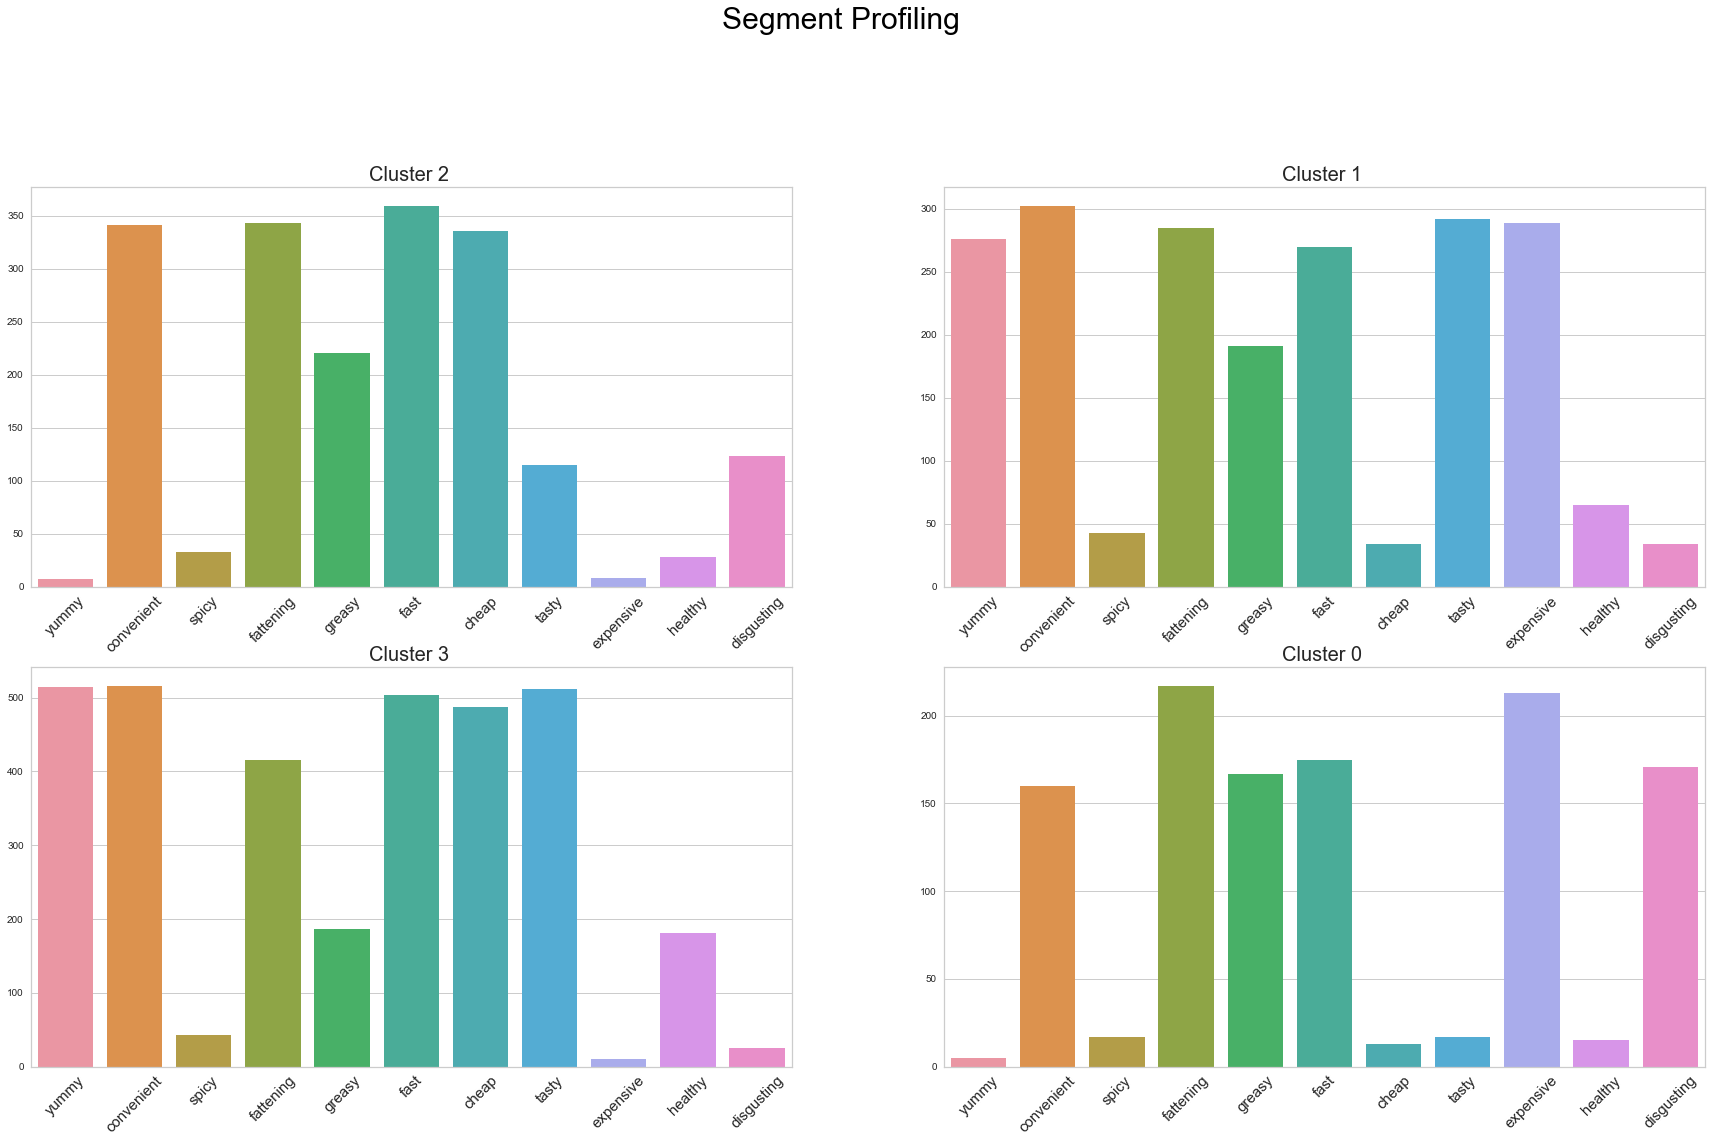

In [32]:
clusters={}
fig = plt.figure(figsize=(30,25))

for i,cluster in enumerate(encoded_data.cluster_num.unique()):
    
    clust_feat_val=[]
    
    plt.subplot(int(len(encoded_data.cluster_num.unique())/2 +1), 2, i+1)
    
    for col in binary_cols:
         clust_feat_val.append(encoded_data[encoded_data.cluster_num==cluster][col].value_counts()[1])
    
    clusters[f'cluster_feature_{cluster}_count']=clust_feat_val
    
    sns.barplot(x=binary_cols, y=clusters[f'cluster_feature_{cluster}_count'])
    plt.xticks(rotation=45, fontsize='15')
    plt.title(f'Cluster {cluster} ', fontsize='20')
    
fig.suptitle("Segment Profiling", fontsize= 30, color = 'black')
plt.show()

Insights:
    
    Cluster 0 contain more number of customers who say McDonald is Fattening and Expensive.
    Cluster 1 contain more number of customers who say McDonald is Conveninent, Fattening,Tasty and Expensive.
    Cluster 2 contain more number of customers who say McDonald is Fast,Conveninent, Fattening and Cheap.
    Cluster 3 contain more number of customers who say McDonald is Yummy,Conveninent, Fattening,Tasty and Fast.
    

### STEP-7 DESCRIBING SEGMENTS

#### Demographic Segmentation

In [33]:
# Clutsers and likes
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,87,28,30,18,12,35,14,6,8,0,0
1,5,2,7,6,6,32,41,58,66,47,44
2,58,38,36,30,30,69,48,45,17,4,0
3,2,3,0,5,10,33,49,78,138,109,99


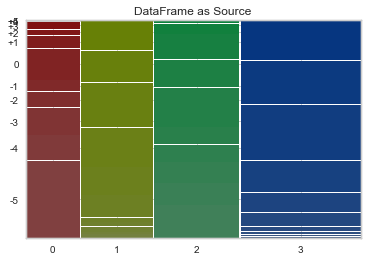

In [34]:
#MOSAIC PLOT
mosaic(crosstab.stack(),gap=0.005,labelizer=lambda k: '',title='DataFrame as Source')
plt.show()

Insights:
    
    Cluster 0 has more number of customers with rating -5
    Cluster 1 has more number of customers with rating +3
    Cluster 2 has more number of customers with rating 0
    Cluster 2 has more number of customers with rating +4

In [35]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,102,136
1,148,166
2,217,158
3,321,205


<Figure size 3600x1440 with 0 Axes>

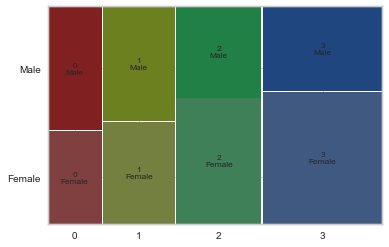

In [36]:
plt.figure(figsize = (50,20))
mosaic(crosstab_gender.stack())
plt.show()

Insights:

    Cluster 0 and 1 has more number of male customers.
    Cluster 2 and 3 has more number of female customers.

<Axes: xlabel='cluster_num', ylabel='Age'>

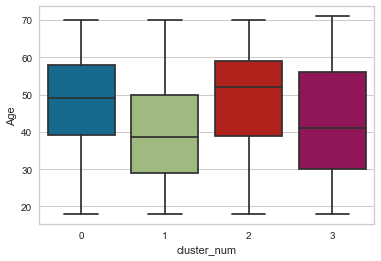

In [37]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=data)

Insights:
    
    More number of customers from cluster 0 are between age 40-60.
    More number of customers from cluster 1 are between age 30-40.
    More number of customers from cluster 2 are between age 40-60.
    More number of customers from cluster 3 are between age 30-55.

### Step-8 Target Segmentation

In [38]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.697479
1,1,2.557325
2,2,2.706667
3,3,2.610266


In [39]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.382353
1,1,3.194268
2,2,5.837333
3,3,2.906844


In [40]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.571429
1,1,0.528662
2,2,0.421333
3,3,0.389734


In [41]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.571429,7.382353,2.697479
1,1,0.528662,3.194268,2.557325
2,2,0.421333,5.837333,2.706667
3,3,0.389734,2.906844,2.610266


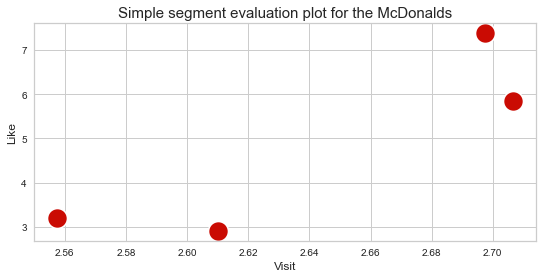

In [42]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the McDonalds",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

Insights:
    
    Above is the plot representng visit frequency of customers wrt to Like. From this we can say that visit frequency is nearly same for customers from all clusters.
    For clusters 0 and 1 the like is 3,4 and fkor clusters 3 and 4 the like is 10,6 respectively.
    Over all cluster 2 has more customers with high like and high visit.

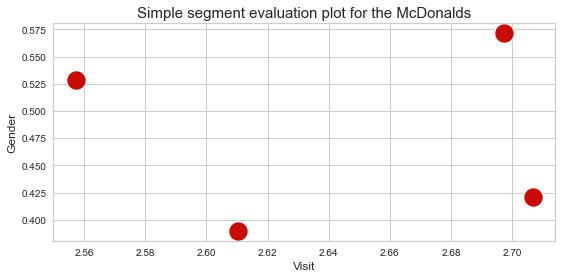

In [43]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Gender",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the McDonalds",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Gender", fontsize = 12) 
plt.show()

Insights:
    
    More Males visited McD in cluster 0 and 4.
    More Females visited McD in cluster 1 and 3.
    Cluster 2 has over all high visit who are males.

### Step-9 Market Mix

McDonalds should consider these:
    
Product:

Focus on the positive aspects highlighted by customers: Tasty, convenient, yummy, and fast.
Consider healthier options or highlight the taste of existing healthy options to address the negative perception of healthiness.
Improve product quality and introducing new menu items based on customer preferences.

Price:

Maintain a balance between affordability (as perceived by a large segment) and value perception.
Explore offering value combos or promotions to target customers who prioritize price (e.g., Cluster 2).

Place:

Maintain a strong presence in convenient locations with easy access for customers.
Consider expanding delivery or online ordering options to cater to customer convenience preferences (Cluster 1 & 3).

Promotion:

Develop targeted marketing campaigns based on customer segments:
Cluster 0 & 1 (Fattening & Expensive perception): Address these concerns, highlight value propositions, and target potentially health-conscious demographics (30-40 year olds).
Cluster 2 (Fast & Convenient): Emphasize speed, convenience, and potentially affordability through promotions.
Cluster 3 (Yummy, Convenient, Tasty & Fast): Focus on the positive taste and convenience aspects that resonate with this segment.